## evaluation metrics
- 分類問題
- 回歸問題

### 回歸問題

- MAE, Mean Absolute Error
- MSE, Mean Square Error
- [R-square](https://zh.wikipedia.org/zh-tw/%E5%86%B3%E5%AE%9A%E7%B3%BB%E6%95%B0)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("dataset/iris.csv")
# 訓練資料
X = df[["SepalLengthCm", "SepalWidthCm","PetalLengthCm"]]
y = df["PetalWidthCm"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

# 訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測類別
y_pred = model.predict(X_test)

# 計算 MAE
mae = mean_absolute_error(y_pred, y_test)

# 計算 R-squared
r2 = r2_score(y_pred, y_test)

# 輸出評估結果
print("MAE:", mae)
print("R-squared:", r2)


NameError: name 'pd' is not defined

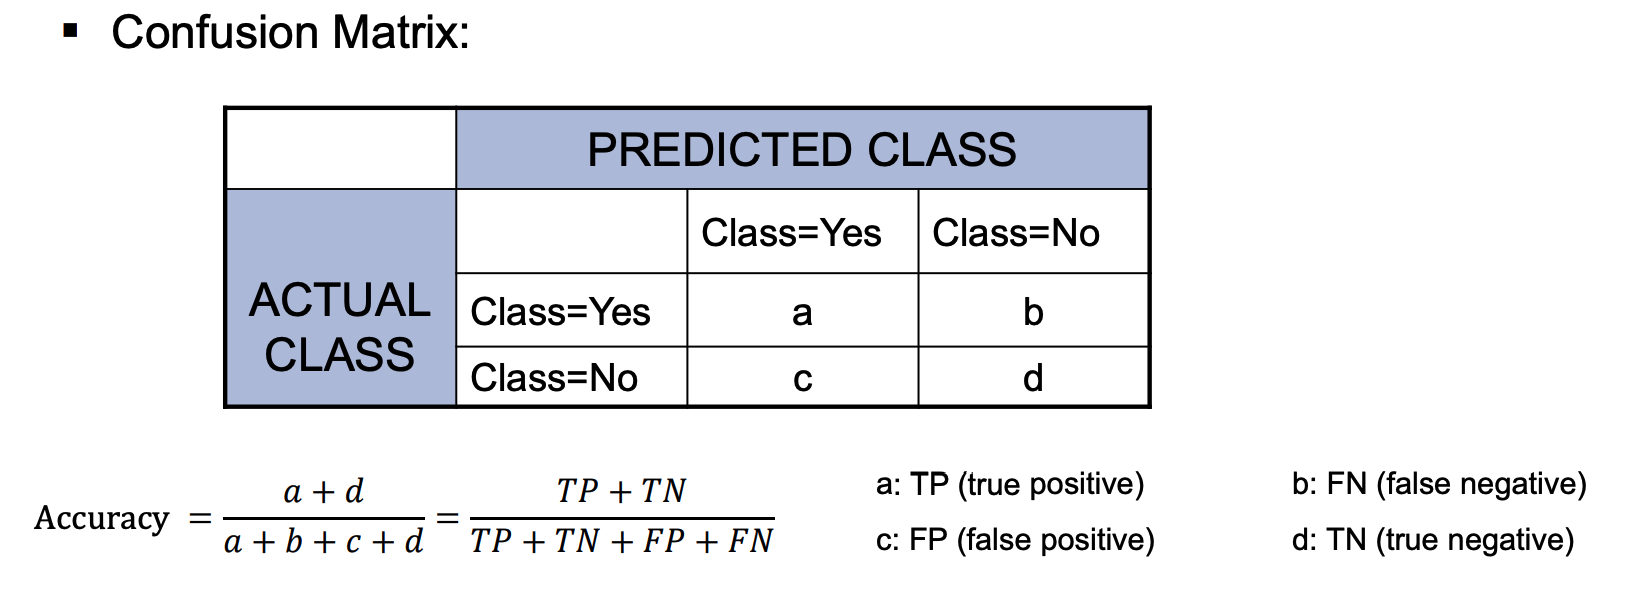

- 準確率 (Accuracy)：模型正確預測的總體比例
- 精確率 (Precision)：模型預測為正的樣本中，真正是正例的比例
- 召回率 (Recall)：true_postive / real_positive
- F1 分數 (F1-score)：精確率和召回率的調和平均值

例如，如果 TP = 100，FN = 20，FP = 10，TN = 170，則：

- 準確率 = (TP + TN) / (TP + FP + FN + TN) = 270 / 300 = 0.9
- 精確率 = TP / (TP + FP) = 100 / 110 = 0.91
- 召回率 = TP / (TP + FN) = 100 / 120 = 0.83
- F1 分數 = 2 * (Precision * Recall) / (Precision + Recall) = 2 * 0.91 * 0.83 / (0.91 + 0.83) = 0.87

### 應用情境範例
- 在醫療診斷中，召回率通常比精確率更重要。這是因為，如果模型漏診了一個病人，可能會導致嚴重的後果。

- [範例練習](https://docs.google.com/presentation/d/1W6KPR9HOLLfFoNyR3eRysHP71buKbtQKbtyZLxNk9aM/edit?usp=sharing)

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# 讀取資料
data = pd.read_csv('dataset/titanic/train.csv')

# 處理缺失值
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

labelencoder = LabelEncoder()
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['Embarked'] = labelencoder.fit_transform(data['Embarked'])

# 選取特徵?
features = ['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']

# 建立模型
model = LogisticRegression()

# 訓練模型
model.fit(data[features], data['Survived'])

# 預測結果
pred = model.predict_proba(data[features])
# print(pred)
# predictions = pred.argmax(axis = 1)

predictions = model.predict(data[features])
print(pred[:5], predictions[:5])
# # predictions = pred.argmax(axis = 1)

# # 計算混淆矩陣
# confusion_matrix = confusion_matrix(data['Survived'], predictions)

# # 輸出混淆矩陣
# print(confusion_matrix)

[[0.89691673 0.10308327]
 [0.07097731 0.92902269]
 [0.44737175 0.55262825]
 [0.10590646 0.89409354]
 [0.93006273 0.06993727]] [0 1 1 1 0]


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 計算準確率
accuracy = accuracy_score(data['Survived'], predictions)

# 計算精確率
precision = precision_score(data['Survived'], predictions)

# 計算召回率
recall = recall_score(data['Survived'], predictions)

# 計算 F1 分數
f1 = f1_score(data['Survived'], predictions)

# 輸出結果
print('準確率：', accuracy)
print('精確率：', precision)
print('召回率：', recall)
print('F1 分數：', f1)

準確率： 0.7901234567901234
精確率： 0.7327327327327328
召回率： 0.7134502923976608
F1 分數： 0.722962962962963


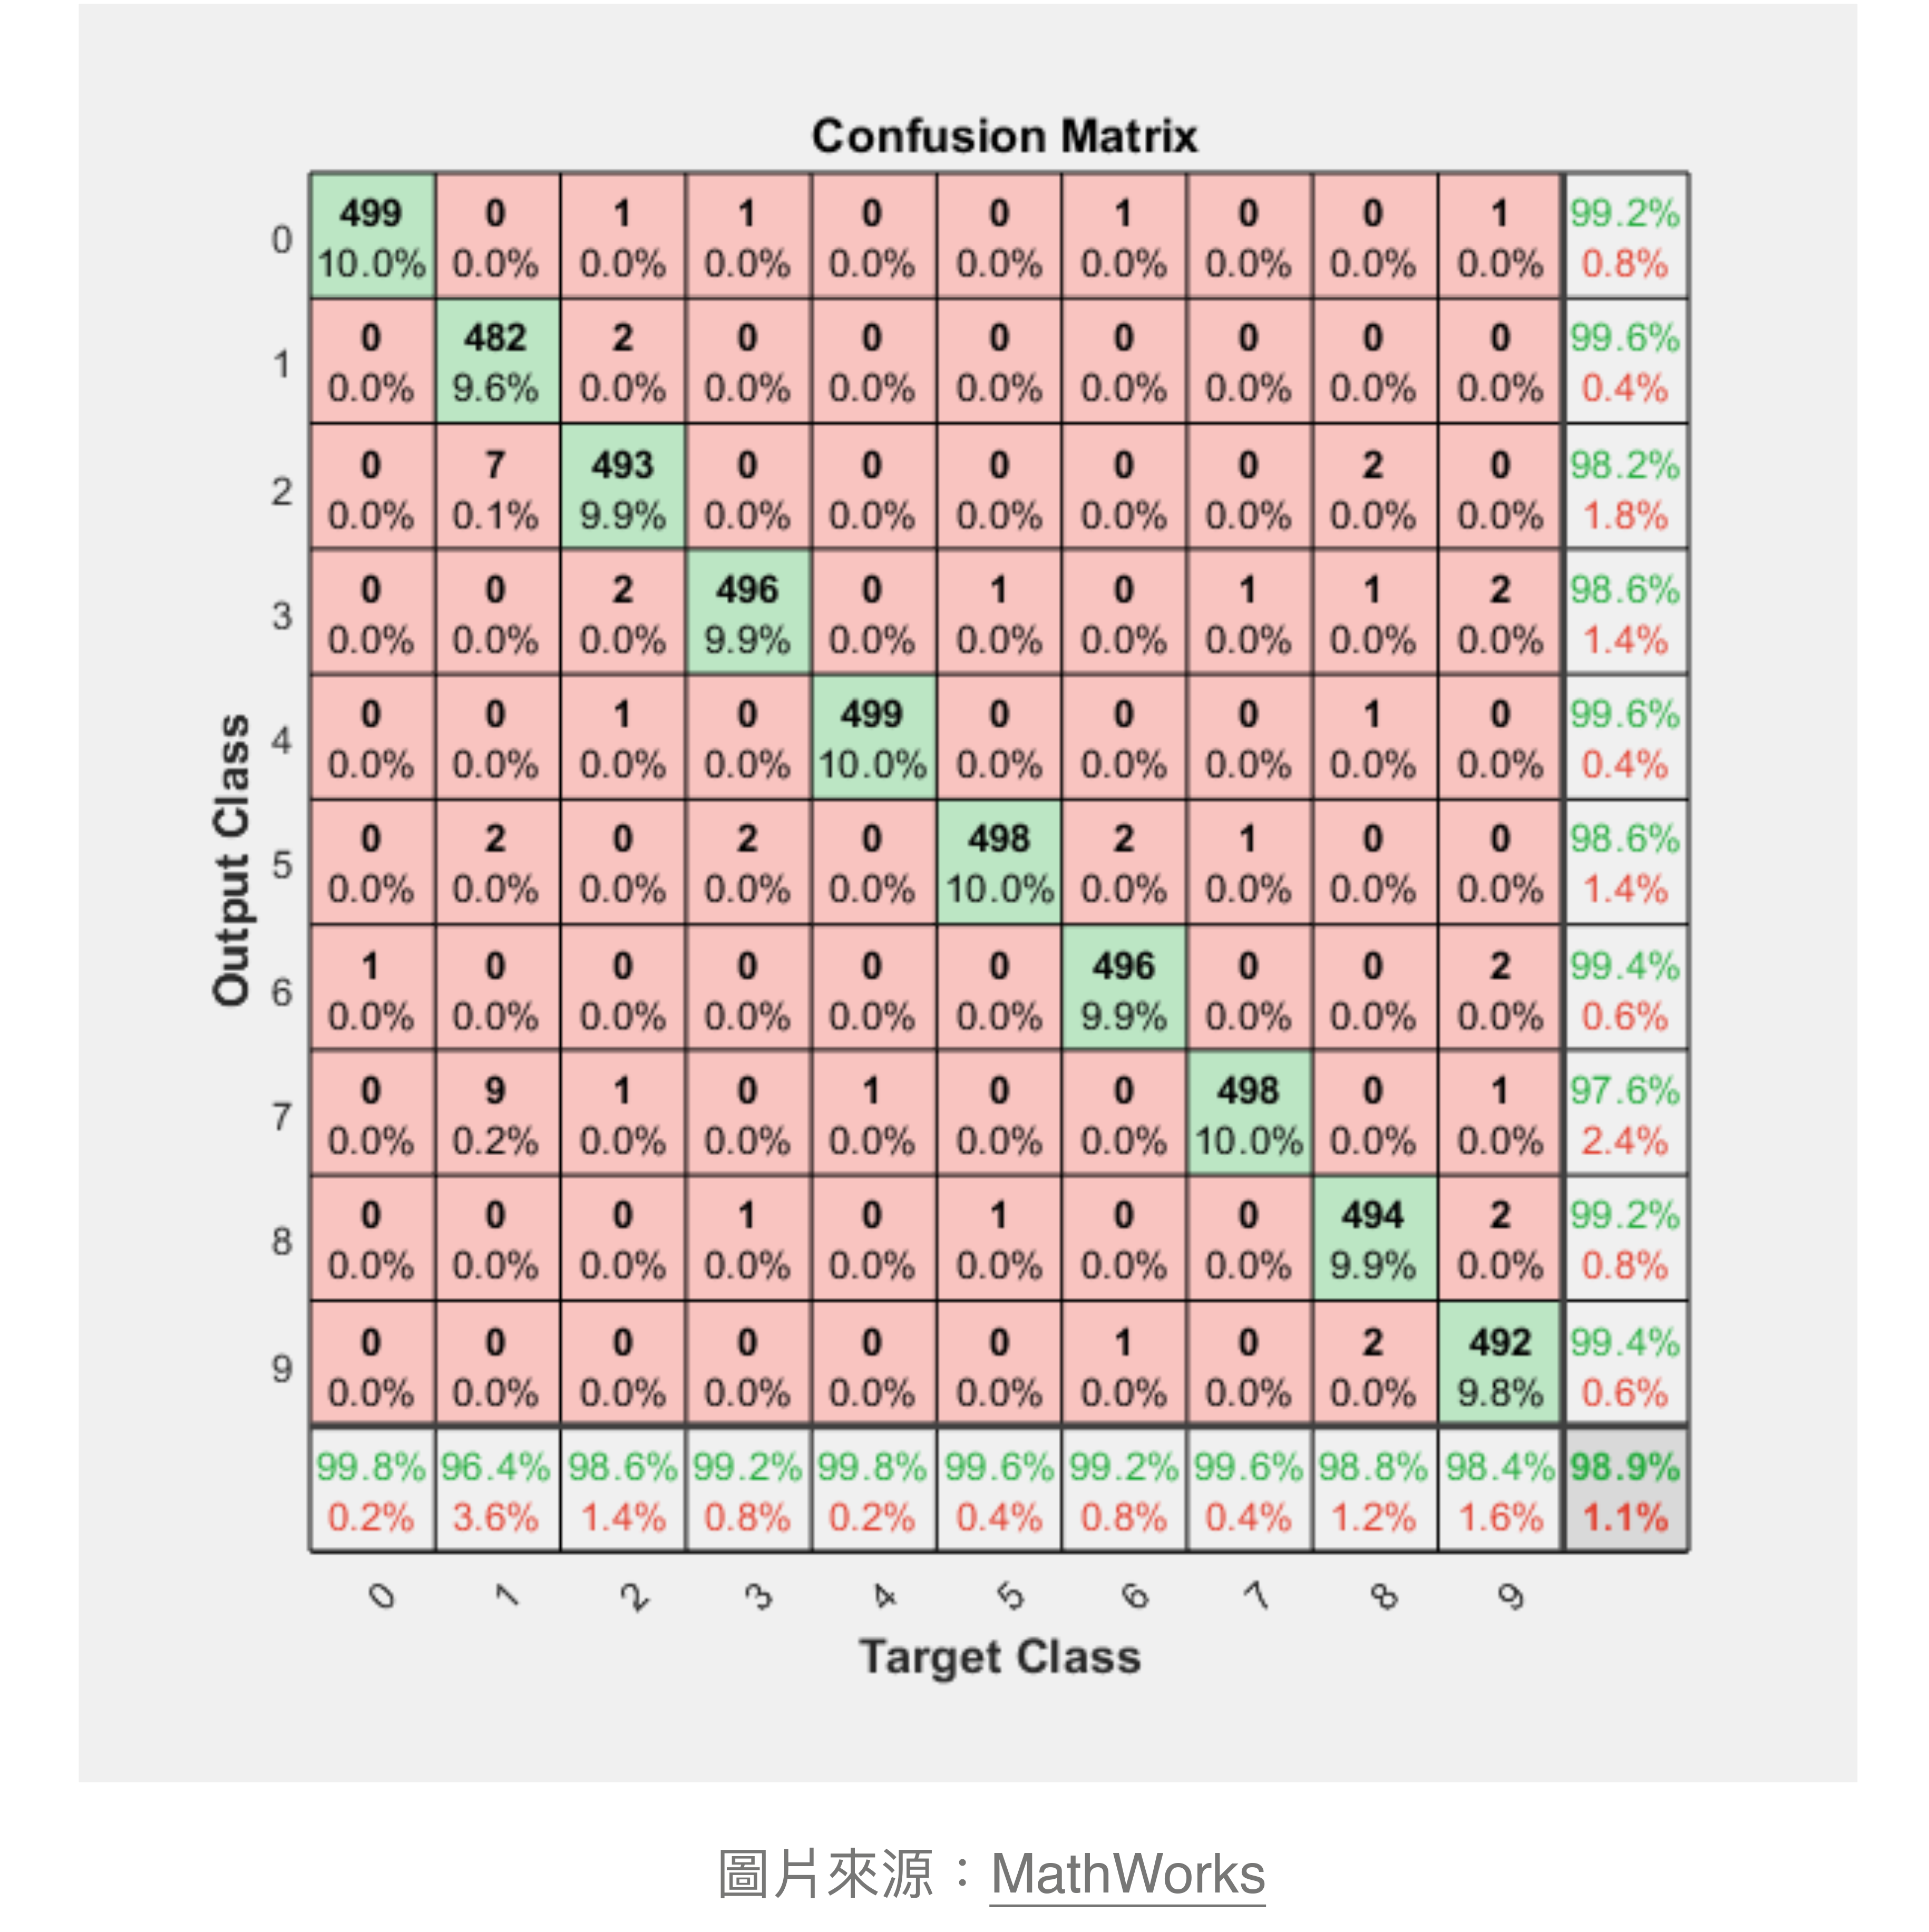

## ROC AUC
- [補充 ROC](https://ithelp.ithome.com.tw/articles/10229049?sc=rss.qu)
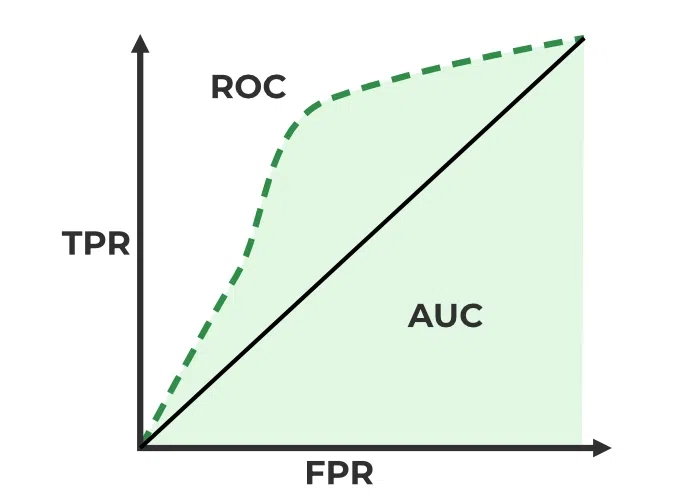

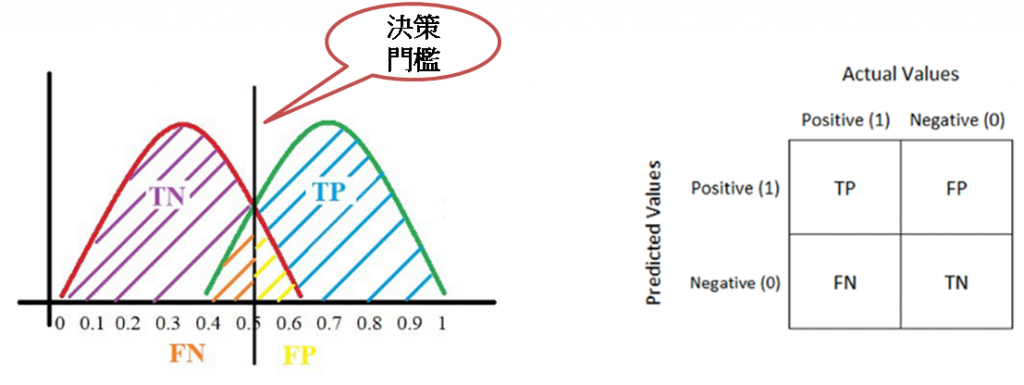
### 不同種的分佈
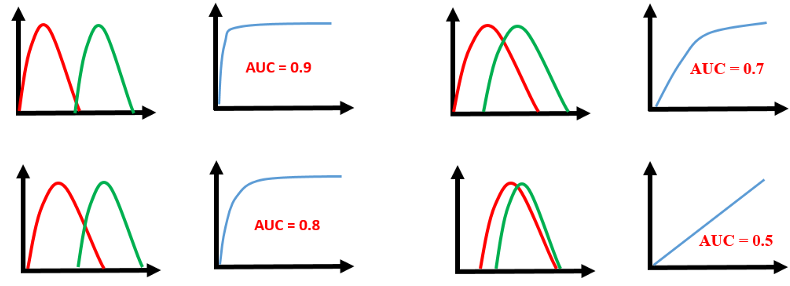

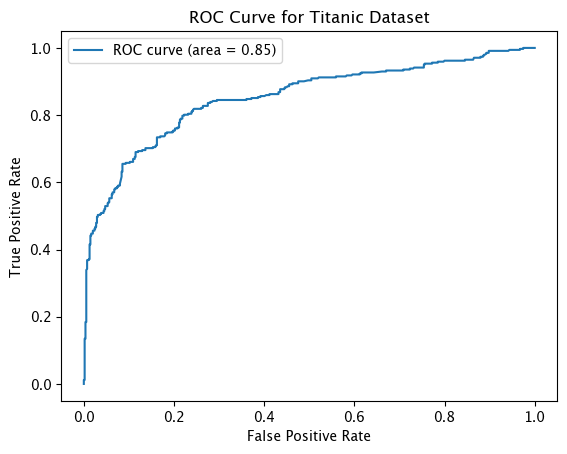

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 計算 ROC 曲線
fpr, tpr, thresholds = roc_curve(data['Survived'], pred[:, 1])
# 計算 AUC
roc_auc = auc(fpr, tpr)

# 繪製 ROC 曲線
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Titanic Dataset')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# 建立模型
model = DecisionTreeClassifier()

# 訓練模型
model.fit(data[features], data['Survived'])

# 預測結果
predictions = model.predict_proba(data[features])

for ele in predictions:
    print(ele)
    
# 接下來就可以透過 map 或者 apply 來去操縱每一個資料應該要是哪個類別了

[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0.66666667 0.33333333]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0.22222222 0.77777778]
[1. 0.]
[1. 0.]
[1. 0.]
[0.83333333 0.16666667]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0.22222222 0.77777778]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0.5 0.5]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.

## Overfitting and Solution
- early stopping

0.6886035313001605


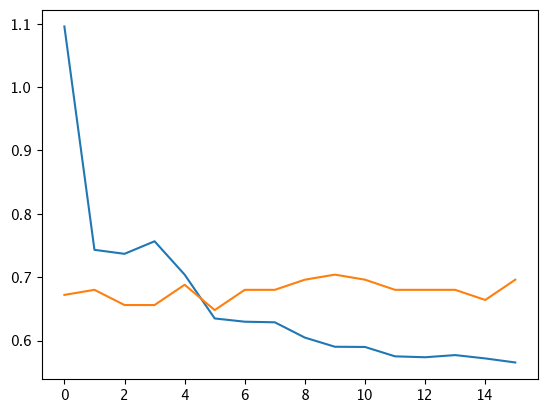

In [9]:
import pandas as pd
from sklearn import model_selection, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(data[features], data['Survived'], test_size=0.3)

mlp=MLPClassifier(
    activation="relu",
    max_iter=100, 
    validation_fraction=0.2, 
    early_stopping=True,
    n_iter_no_change = 5)

mlp.fit(X_train,y_train)

print(mlp.score(X_train,y_train))
# print(mlp.loss_curve_)
plt.plot(mlp.loss_curve_)
plt.plot(mlp.validation_scores_)

## k-fold
K-Fold 交叉驗證是一種常用的模型評估方法，它可以有效地利用有限的資料來提高模型的泛化能力。一般來說，K-Fold 交叉驗證適用於以下類型的資料集：

- 資料量較小：如果資料量較小，則使用 K-Fold 交叉驗證可以避免過擬合，提高模型的泛化能力。
- 資料分佈不均衡：如果資料分佈不均衡，則使用 K-Fold 交叉驗證可以確保每個折疊都包含所有類別的樣本，從而提高模型的性能。
- 資料存在噪聲：如果資料存在噪聲，則使用 K-Fold 交叉驗證可以提高模型的魯棒性。

- [link](https://claire-chang.com/2023/06/21/k-fold-cross-validation%EF%BC%88%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89%EF%BC%89/)

/Users/hongyicheng/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hongyicheng/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hongyicheng/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hongyicheng/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


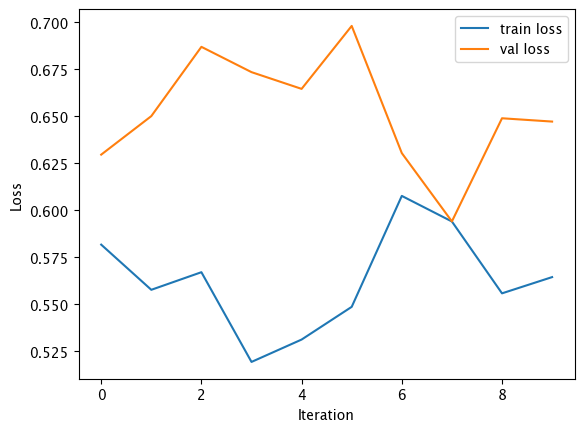

In [87]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier


# KFold 交叉驗證
kf = KFold(n_splits=10)

# 儲存每次迭代的損失函數值
losses = []
val_losses = []

# 訓練模型
for train_index, test_index in kf.split(data[features], data['Survived']):
    X_train, X_test = data[features].loc[train_index], data[features].loc[test_index]
    y_train, y_test = data['Survived'].loc[train_index], data['Survived'].loc[test_index]
    
    model = MLPClassifier(
        activation="relu",
        max_iter=30, 
        validation_fraction=0.2, 
        early_stopping=True)
    model.fit(X_train, y_train)

    losses.append(model.loss_)
    val_losses.append(np.array(model.validation_scores_).mean())
    
# 繪製 loss curve
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="val loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()


## 案例
- [credit card fraud](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- [code](https://www.kaggle.com/code/joparga3/in-depth-skewed-data-classif-93-recall-acc-now)

### 偏差（Bias）
偏差是指模型在學習過程中對學習數據的一種誤解，即模型的預測值與實際值之間的差異。一個高偏差的模型往往意味著它過於簡化（underfitting），無法捕捉到數據的真實關係，因此無法準確反映複雜的數據結構。例如，線性回歸模型，它通過一條直線來擬合所有的數據點，但當真實關係是非線性時，直線模型就無法有效地捕捉這種關係，導致高偏差。

### 方差（Variance）
方差是指模型對於給定數據的小變動過於敏感，即模型在不同的數據子集上的表現存在較大的變異性。高方差通常與過度擬合（overfitting）相關，意味著模型過於複雜，以至於它學習了數據中的隨機誤差或是無關緊要的細節，而不僅僅是基本關係。例如多項式回歸就是一個例子，這種模型可以非常好地適應訓練集的數據點，但在新的、未見過的數據集上可能表現不佳，因為它將訓練集中的特殊特徵視為一般規律。

在機器學習中，找到偏差和方差之間的最佳平衡是關鍵，這通常涉及到選擇一個既不過於簡單也不過於複雜的模型。過於簡單的模型難以捕捉數據的所有相關特徵（高偏差），而過於複雜的模型則可能將數據中的隨機誤差解釋為重要信號（高方差）。

- [延伸閱讀](https://jason-chen-1992.weebly.com/home/-bias-variance-tradeoff)

## 正規化
什麼是正規化？

在機器學習中，正規化是一種技術，可防止模型過度擬合訓練資料。過擬合是指模型在訓練資料上表現良好，但在新資料（測試資料）上表現不佳。

### 正規化如何運作？

正規化透過在模型的損失函數中加入額外的正則化項目來運作。損失函數衡量模型預測與實際值之間的誤差。正則化項目懲罰模型的複雜度，例如模型中參數的數量或權重的大小。

#### L1 正則化（Lasso）

L1 正則化會將模型中所有參數的絕對值添加到損失函數中。這會導致某些參數變為零，從而使模型稀疏。換句話說，它會移除不重要的特徵。

#### L2 正則化（Ridge）

L2 正則化會將模型中所有參數的平方值添加到損失函數中。這會導致所有權重值變小，但不會變為零。它會使模型更穩定，但不會產生稀疏的結果。

### 何時使用正規化？

當您發現模型在訓練資料上表現良好，但在測試資料上表現不佳時，正規化非常有用。這可能是過擬合的跡象。

### 正規化的優點

1. 防止過擬合
2. 提高模型的泛化能力（在新資料上的表現）
3. 使模型更穩定，不易受到噪音或異常值的影響
### 注意事項
正規化是一個超參數調整過程。您需要找出最適合您的模型和資料的正則化程度。如果正則化程度太強，模型可能會欠擬合，這表示模型無法從資料中學習足夠的模式。

- [參考文章](https://dysonma.github.io/2021/01/27/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E6%AD%A3%E8%A6%8F%E5%8C%96-Regularization/)
- [參考文章 損失函數與正則項](https://medium.com/@renimatsa/%E8%BF%B4%E6%AD%B8%E6%A8%A1%E5%9E%8B%E6%AD%A3%E8%A6%8F%E5%8C%96-normalization-9141ed8b9edf)

### LASSO 與 Ridge 回歸整理

**LASSO 與 Ridge 回歸**

* LASSO 與 Ridge 回歸都是回歸模型，在原有的線性回歸模型中加入正則化項，以防止過擬合。
* LASSO 使用 L1 正則化，Ridge 使用 L2 正則化。
* L1 正則化會使模型的參數稀疏，具有特徵選取的效果。
* L2 正則化會使模型的參數平滑，具有防止過擬合的效果。

**超參數 α**

* α 是正則化項的係數，用於控制正則化的強度。
* α 越大，正則化強度越強，模型越不容易過擬合，但也會導致偏差增加。
* α 越小，正則化強度越弱，模型的偏差越小，但也有可能過擬合。

**選擇 LASSO 或 Ridge**

* LASSO 和 Ridge 各有優缺點，在實務上可以根據以下因素進行選擇：
    * **資料集特徵數量**：如果特徵數量較多，可以考慮使用 LASSO 進行特徵選取。
    * **資料集噪聲**：如果資料集噪聲較大，可以考慮使用 Ridge 進行防止過擬合。

Lasso 跟 Ridge 都是回歸問題的模型，那麼在使用時應該先用哪個模型跑呢？

從模型的特性來看，Lasso 使用的是 L1 regularization，這個正則化的特性會讓模型變得較為稀疏，除了能做特徵選取外，也會讓模型變得更輕量，速度較快。實務上因為訓練回歸模型非常容易，可以兩者都跑跑看，在比較準確率，應該不會有太大的差異！

[範例](https://www.kaggle.com/code/niteshyadav3103/linear-regression-regularization-lasso-ridge)

In [109]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression

# 訓練資料

# LASSO 回歸模型
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Ridge 回歸模型
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)


# LASSO 回歸模型預測
y_pred_lasso = lasso.predict(X_test)

# Ridge 回歸模型預測
y_pred_ridge = ridge.predict(X_test)

print("Lasso")
# 計算 MAE
mae = mean_absolute_error(y_pred_lasso, y_test)

# 計算 R-squared
r2 = r2_score(y_pred_lasso, y_test)

# 輸出評估結果
print("MAE:", mae)
print("R-squared:", r2)


print("Ridge")
# 計算 MAE
mae = mean_absolute_error(y_pred_ridge, y_test)

# 計算 R-squared
r2 = r2_score(y_pred_ridge, y_test)

# 輸出評估結果
print("MAE:", mae)
print("R-squared:", r2)

Lasso
MAE: 0.17934349486486684
R-squared: 0.8869775499491628
Ridge
MAE: 0.1706277005051555
R-squared: 0.9141160705342287


## imblanced dataset
- 經典的分類問題中(classification problem)，當資料集的目標類別(Target Class)資料量差距比例過大(Major Class versus Minor Class)或者在多類別資料中具有類別分布不平均即可稱作為不平衡資料(imbalanced dataset)

### 資料採樣

- 上採樣 (oversampling)：增加負例樣本的數量，使正例和負例樣本數量趨於平衡。常用的上採樣方法包括:
    - SMOTE (Synthetic Minority Over-sampling Technique)：通過生成合成樣本來增加負例樣本的數量。
- 下採樣 (undersampling)：減少正例樣本的數量，使正例和負例樣本數量趨於平衡。常用的下採樣方法包括:
    - Tomek links：刪除與其他正例樣本距離較近的正例樣本。

### SMOTE 上採樣 (oversampling)
1. 從小類別樣本中隨機選取一個樣本。
2. 計算該樣本的K個最近鄰居。
3. 從K個最近鄰居中隨機選取一個樣本。
4. 在兩個選取的樣本之間生成一個新的合成樣本。
5. 新合成樣本的標籤與兩個選取的樣本的標籤相同。
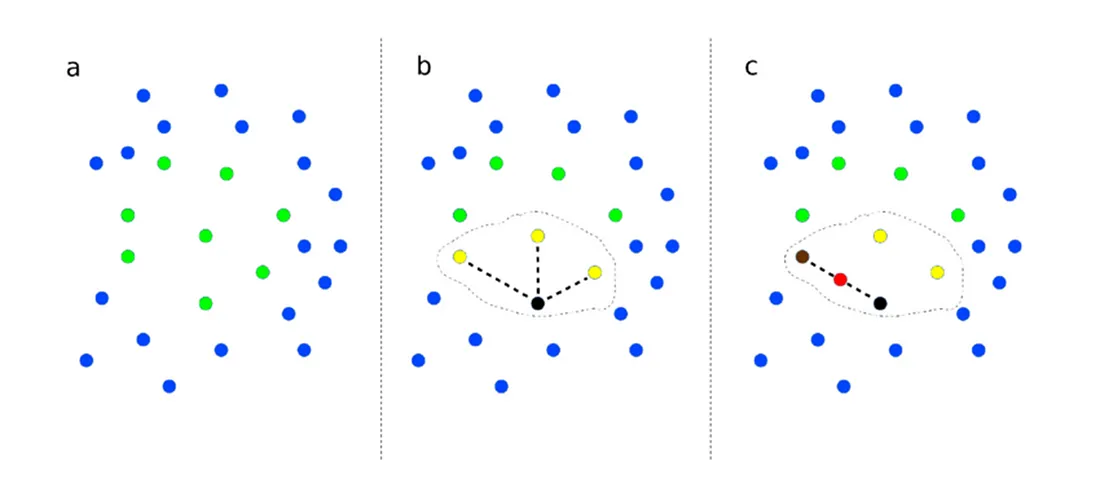

In [11]:
from imblearn.over_sampling import SMOTE
import pandas as pd
# 訓練資料

df = pd.read_csv("dataset/creditcard.csv")
sample_data = df.sample(10000)
sample_data.groupby("Class").size()

Class
0    9990
1      10
dtype: int64

In [60]:
X = sample_data.iloc[:, :-1]
y = sample_data["Class"]
# 過度採樣
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 輸出過度採樣後的資料
print(X_resampled)
print(y_resampled)

               Time         V1         V2         V3        V4         V5  \
0      89709.000000   2.187642  -1.072768  -0.475407 -0.872584  -1.069233   
1      22911.000000   1.166088   0.823674   0.230843  2.642189   0.510487   
2      81637.000000   1.100013   0.356121   0.498790  2.131124   0.273096   
3      40729.000000  -0.623678   0.848057   1.456551 -0.245886   0.832272   
4      78279.000000  -0.347314   0.964901   0.786464 -0.372603   0.797480   
...             ...        ...        ...        ...       ...        ...   
19969  15202.323602  -1.400266   3.448210  -7.109962  4.487845  -3.221844   
19970  58490.963858  -1.573467   2.513018  -3.201614  2.479101  -1.511436   
19971  19287.590466 -13.716852   9.092013 -17.394648  5.546635 -11.273976   
19972  42886.720994  -3.387524   2.529006  -3.946082  0.441701  -2.339634   
19973  41124.167012 -16.117701  10.198077 -18.575742  5.133400 -12.114271   

             V6         V7         V8        V9  ...       V20       V21  \

In [75]:
pd.DataFrame(y_resampled).groupby("Class").value_counts()

Class
0    9987
1    9987
Name: count, dtype: int64

In [94]:
from imblearn.under_sampling import TomekLinks

df = pd.read_csv("dataset/creditcard.csv")
sample_data = df.sample(100000)
X = sample_data.iloc[:, :-1]
y = sample_data["Class"]

X_resampled, y_resampled = TomekLinks().fit_resample(X, y)


In [96]:
sample_data[["Class"]].groupby("Class").value_counts()

Class
0    99835
1      165
Name: count, dtype: int64

In [95]:
pd.DataFrame(y_resampled).groupby("Class").value_counts()

Class
0    99803
1      165
Name: count, dtype: int64

- [imbalanced data handling sample](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data#1.2-Undersampling-using-Tomek-Links)

## 作業
- 透過今天上述教的所有內容，嘗試去解這個 kaggle 資料集的問題。
- [kaggle](https://www.kaggle.com/competitions/playground-series-s4e1)